In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

ewz = yf.download('EWZ', start='2019-01-01', end='2024-01-01')

ewz.to_csv('ewz_data.csv')

ewz.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EWZ,EWZ,EWZ,EWZ,EWZ
Date,,,,,
2019-01-02,27.534132,27.628983,26.328160,26.382359,41926700
2019-01-03,27.710287,27.805139,27.385079,27.778037,24851700
2019-01-04,28.333601,28.523304,27.540912,27.696740,40899800
2019-01-07,28.049049,28.448782,27.927097,28.421681,26407700
2019-01-08,28.387796,28.435222,27.981287,28.177766,23524800


In [ ]:
ewz.to_csv('ewz_data.csv')


In [ ]:
ewz = pd.read_csv('ewz_data.csv', skiprows=2)

ewz.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

ewz['Date'] = pd.to_datetime(ewz['Date'])

ewz.set_index('Date', inplace=True)

for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    ewz[col] = pd.to_numeric(ewz[col], errors='coerce')

ewz.dropna(inplace=True)

ewz.head()


,Close,High,Low,Open,Volume
Date,,,,,
2019-01-02,27.534132,27.628983,26.328160,26.382359,41926700
2019-01-03,27.710287,27.805139,27.385079,27.778037,24851700
2019-01-04,28.333601,28.523304,27.540912,27.696740,40899800
2019-01-07,28.049049,28.448782,27.927097,28.421681,26407700
2019-01-08,28.387796,28.435222,27.981287,28.177766,23524800


In [31]:
ewz['Dispersion_Ratio'] = (ewz['High'] - ewz['Low']) / ewz['Open']
ewz

,Close,High,Low,Open,Volume,Dispersion_Ratio,Target
Date,,,,,,,
2019-01-02,27.534132,27.628983,26.328160,26.382359,41926700,0.049307,1
2019-01-03,27.710287,27.805139,27.385079,27.778037,24851700,0.015122,1
2019-01-04,28.333601,28.523304,27.540912,27.696740,40899800,0.035470,0
2019-01-07,28.049049,28.448782,27.927097,28.421681,26407700,0.018355,1
2019-01-08,28.387796,28.435222,27.981287,28.177766,23524800,0.016110,1
...,...,...,...,...,...,...,...
2023-12-22,32.032322,32.235879,31.902787,31.939798,16014400,0.010429,1
2023-12-26,32.522713,32.587480,32.282144,32.365418,15982400,0.009434,1
2023-12-27,32.633743,32.698511,32.420935,32.504208,18672900,0.008540,0


In [7]:
ewz['Target'] = (ewz['Close'].shift(-1) > ewz['Close']).astype(int)
ewz.dropna(inplace=True)


In [8]:
X = ewz[['Dispersion_Ratio']]
y = ewz['Target']


In [ ]:
ewz[['Dispersion_Ratio', 'Target']].head()

,Dispersion_Ratio,Target
Date,,
2019-01-02,0.049307,1
2019-01-03,0.015122,1
2019-01-04,0.035470,0
2019-01-07,0.018355,1
2019-01-08,0.016110,1


          Model  Mean Accuracy  Std Dev Accuracy  Training Time (s)
0  All Features       0.503171          0.018688           0.021673
1   Selected(1)       0.503171          0.018688           0.017659


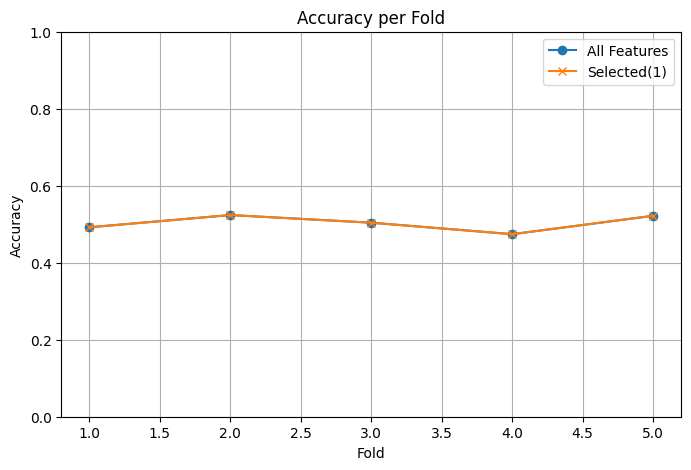

In [ ]:
import time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
start_full = time.time()
scores_full = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
end_full = time.time()

start_selected = time.time()
scores_selected = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
end_selected = time.time()

results_table = pd.DataFrame({
    'Model': ['All Features', 'Selected(1)'],
    'Mean Accuracy': [scores_full.mean(), scores_selected.mean()],
    'Std Dev Accuracy': [scores_full.std(), scores_selected.std()],
    'Training Time (s)': [end_full - start_full, end_selected - start_selected]
})

print(results_table)

plt.figure(figsize=(8,5))
plt.plot(range(1,6), scores_full, marker='o', label='All Features')
plt.plot(range(1,6), scores_selected, marker='x', label='Selected(1)')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from datetime import datetime, timedelta

def download_data():
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5*365)

    ewz = yf.download('EWZ', start=start_date, end=end_date)

    price_col = 'Adj Close' if 'Adj Close' in ewz.columns else 'Close'

    ewz['Return'] = ewz[price_col].pct_change()

    ewz['Volatility_5d'] = ewz['Return'].rolling(window=5).std()
    ewz['Volatility_20d'] = ewz['Return'].rolling(window=20).std()
    ewz['RSI_14'] = calculate_rsi(ewz[price_col], 14)
    ewz['SMA_5'] = ewz[price_col].rolling(window=5).mean()
    ewz['SMA_20'] = ewz[price_col].rolling(window=20).mean()
    ewz['EMA_5'] = ewz[price_col].ewm(span=5, adjust=False).mean()
    ewz['EMA_20'] = ewz[price_col].ewm(span=20, adjust=False).mean()
    ewz['Volume_Change'] = ewz['Volume'].pct_change()

    if all(col in ewz.columns for col in ['High', 'Low', 'Open']):
        ewz['Price_Range'] = (ewz['High'] - ewz['Low']) / ewz['Open']
        ewz['ATR_14'] = calculate_atr(ewz, price_col, 14)

    ewz['Target'] = (ewz['Return'].shift(-1) > 0).astype(int)

    ewz = ewz.dropna()

    return ewz, price_col

def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    avg_loss = avg_loss.replace(0, np.nan)
    rs = avg_gain / avg_loss
    rs = rs.fillna(0)

    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_atr(data, price_col, window=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data[price_col].shift())
    low_close = np.abs(data['Low'] - data[price_col].shift())

    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)

    return true_range.rolling(window=window).mean()

def correlation_feature_selection(data, price_col, threshold=0.5):
    exclude_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'Target']
    if price_col == 'Adj Close':
        exclude_cols.append('Adj Close')

    features = data.drop([col for col in exclude_cols if col in data.columns], axis=1)
    target = data['Target']


    correlation = {}
    for column in features.columns:
        correlation[column] = abs(np.corrcoef(features[column], target)[0, 1])

    sorted_features = sorted(correlation.items(), key=lambda x: x[1], reverse=True)

    selected_features = [feature for feature, corr in sorted_features if corr > threshold]

    print(f"Selected features (correlation > {threshold}):")
    for feature, corr in sorted_features:
        print(f"{feature}: {corr:.4f}" + (" (Selected)" if corr > threshold else ""))

    return selected_features, sorted_features

def k_fold_validation(data, price_col, k=5, selected_features=None, use_all_features=False):
    exclude_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'Target']
    if price_col == 'Adj Close':
        exclude_cols.append('Adj Close')

    if use_all_features:
        features = data.drop([col for col in exclude_cols if col in data.columns], axis=1)
    else:
        valid_features = [f for f in selected_features if f in data.columns]
        if len(valid_features) != len(selected_features):
        features = data[valid_features]

    target = data['Target']

    scaler = StandardScaler()
    X = scaler.fit_transform(features)
    y = target.values

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    accuracies = []
    training_times = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        start_time = time.time()
        mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, early_stopping=True)
        mlp.fit(X_train, y_train)
        training_time = time.time() - start_time

        y_pred = mlp.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        accuracies.append(accuracy)
        training_times.append(training_time)

    return np.mean(accuracies), np.std(accuracies), np.mean(training_times), np.std(training_times)

def create_results_table(data, price_col, correlation_thresholds):
    results = {
        'Threshold': [],
        'Feature Count': [],
        'Accuracy': [],
        'Accuracy Std': [],
        'Training Time (s)': [],
        'Training Time Std (s)': []
    }

    all_features_accuracy, all_features_accuracy_std, all_features_time, all_features_time_std = k_fold_validation(data, price_col, use_all_features=True)

    exclude_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'Target']
    if price_col == 'Adj Close':
        exclude_cols.append('Adj Close')

    all_features_count = len(data.drop([col for col in exclude_cols if col in data.columns], axis=1).columns)

    results['Threshold'].append('All')
    results['Feature Count'].append(all_features_count)
    results['Accuracy'].append(all_features_accuracy)
    results['Accuracy Std'].append(all_features_accuracy_std)
    results['Training Time (s)'].append(all_features_time)
    results['Training Time Std (s)'].append(all_features_time_std)

    for threshold in correlation_thresholds:
        selected_features, _ = correlation_feature_selection(data, price_col, threshold)

        if len(selected_features) > 0:
            accuracy, accuracy_std, training_time, training_time_std = k_fold_validation(data, price_col, selected_features=selected_features)

            results['Threshold'].append(threshold)
            results['Feature Count'].append(len(selected_features))
            results['Accuracy'].append(accuracy)
            results['Accuracy Std'].append(accuracy_std)
            results['Training Time (s)'].append(training_time)
            results['Training Time Std (s)'].append(training_time_std)

    results_df = pd.DataFrame(results)

    results_df['Accuracy Improvement (%)'] = ((results_df['Accuracy'] / results_df.loc[0, 'Accuracy']) - 1) * 100
    results_df['Training Time Reduction (%)'] = ((results_df.loc[0, 'Training Time (s)'] - results_df['Training Time (s)']) / results_df.loc[0, 'Training Time (s)']) * 100

    return results_df

def create_graphs(results_df, sorted_features):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    x_labels = [str(x) for x in results_df['Threshold']]

    axs[0].bar(range(len(x_labels)), results_df['Accuracy Improvement (%)'])
    axs[0].set_xticks(range(len(x_labels)))
    axs[0].set_xticklabels(x_labels)
    axs[0].set_xlabel('Correlation Threshold')
    axs[0].set_ylabel('Accuracy Improvement (%)')
    axs[0].set_title('Accuracy Improvement vs. Correlation Threshold')
    axs[0].grid(True, alpha=0.3)

    axs[1].bar(range(len(x_labels)), results_df['Training Time Reduction (%)'])
    axs[1].set_xticks(range(len(x_labels)))
    axs[1].set_xticklabels(x_labels)
    axs[1].set_xlabel('Correlation Threshold')
    axs[1].set_ylabel('Training Time Reduction (%)')
    axs[1].set_title('Training Time Reduction vs. Correlation Threshold')
    axs[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('ewz_performance_metrics.png')
    plt.close()

    feature_names = [feature for feature, _ in sorted_features]
    correlations = [corr for _, corr in sorted_features]

    if len(feature_names) > 10:
        feature_names = feature_names[:10]
        correlations = correlations[:10]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), correlations)
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel('Absolute Correlation with Target')
    plt.ylabel('Features')
    plt.title('Feature Correlations with Target Variable')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('ewz_feature_correlations.png')
    plt.close()

if __name__ == "__main__":
    data, price_col = download_data()

    _, sorted_features = correlation_feature_selection(data, price_col, threshold=0) 

    correlation_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
    results_table = create_results_table(data, price_col, correlation_thresholds)


    results_table.to_csv('ewz_results_table.csv', index=False)

    create_graphs(results_table, sorted_features)



[*********************100%***********************]  1 of 1 completed


Using Close column for price data. Available columns: [('Close', 'EWZ'), ('High', 'EWZ'), ('Low', 'EWZ'), ('Open', 'EWZ'), ('Volume', 'EWZ')]
Downloaded data with 1236 rows
Feature columns being analyzed: [('Volatility_5d', ''), ('Volatility_20d', ''), ('RSI_14', ''), ('SMA_5', ''), ('SMA_20', ''), ('EMA_5', ''), ('EMA_20', ''), ('Volume_Change', ''), ('Price_Range', ''), ('ATR_14', '')]
Selected features (correlation > 0):
('SMA_5', ''): 0.0690 (Selected)
('EMA_5', ''): 0.0684 (Selected)
('EMA_20', ''): 0.0683 (Selected)
('SMA_20', ''): 0.0646 (Selected)
('Volatility_5d', ''): 0.0398 (Selected)
('Volatility_20d', ''): 0.0319 (Selected)
('Price_Range', ''): 0.0260 (Selected)
('ATR_14', ''): 0.0210 (Selected)
('Volume_Change', ''): 0.0187 (Selected)
('RSI_14', ''): 0.0021 (Selected)
Feature columns being analyzed: [('Volatility_5d', ''), ('Volatility_20d', ''), ('RSI_14', ''), ('SMA_5', ''), ('SMA_20', ''), ('EMA_5', ''), ('EMA_20', ''), ('Volume_Change', ''), ('Price_Range', ''), ('ATR